# 1. 다층 퍼셉트론(MultiLayer Perceptron, MLP)

단층 퍼셉트론의 형태에서 은닉층이 1개 이상 추가된 신경망을 다층 퍼셉트론(MLP)이라고 한다.
다층 퍼셉트론은 피드 포워드 신경망(Feed Forward Neural Network, FFNN)의 가장 기본적인 형태입니다. 피드 포워드 신경망은 입력층에서 출력층으로 오직 한 방향으로만 연산 방향이 정해져 있는 신경망을 말합니다.


In [1]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer


In [2]:
texts = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']

In [3]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(texts)
print(tokenizer.word_index)

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


텍스트 데이터에 texts_to_matrix()를 사용해보겠습니다. texts_to_matrix()란 이름에서 알 수 있지만, 이 도구는 입력된 텍스트 데이터로부터 행렬(matrix)를 만드는 도구입니다. texts_to_matrx()는 총 4개의 모드를 지원하는데 각 모드는 'binary', 'count', 'freq', 'tfidf'로 총 4개입니다. 우선 'count' 모드를 사용해봅시다

In [5]:
print(tokenizer.texts_to_matrix(texts,mode='count'))

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


'count'를 사용하면 우리가 앞서 배운 문서 단어 행렬(Document-Term Matrix, DTM)을 생성합니다. DTM에서의 인덱스는 앞서 확인한 word_index의 결과입니다.

다만 주의할 점은 각 단어에 부여되는 인덱스는 1부터 시작하는 반면에 완성되는 행렬의 인덱스는 0부터 시작합니다. 실제로 단어의 개수는 9개였지만 완성된 행렬의 열의 개수는 10개인 것과 첫번째 열은 모든 행에서 값이 0인 것을 볼 수 있습니다. 인덱스 0에는 그 어떤 단어도 할당되지 않았기 때문입니다.

In [6]:
print(tokenizer.texts_to_matrix(texts,mode='binary'))

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


'binary' 모드는 해당 단어가 존재하는지만 관심을 가지고 해당 단어가 몇 개였는지는 무시
해당 단어가 존재하면 1, 단어가 존재하지 않으면 0의 값을 가집니다. 즉, 단어의 존재 유무로만 행렬을 표현

In [7]:
print(tokenizer.texts_to_matrix(texts,mode='tfidf').round(2))

[[0.   0.   0.85 0.85 1.1  0.   0.   0.   0.   0.  ]
 [0.   0.85 0.85 0.85 0.   0.   0.   0.   0.   0.  ]
 [0.   1.43 0.   0.   0.   1.1  1.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.1  1.1  1.1 ]]


'tfidf' 모드는 말 그대로 TF-IDF 행렬을 만듭니다.TF는 각 문서에서의 각 단어의 빈도였다면 'tfidf' 모드에서는 TF를 각 문서에서의 각 단어의 빈도에 자연 로그를 씌우고 1을 더한 값으로 정의했습니다.

In [8]:
print(tokenizer.texts_to_matrix(texts, mode = 'freq').round(2)) #

[[0.   0.   0.33 0.33 0.33 0.   0.   0.   0.   0.  ]
 [0.   0.33 0.33 0.33 0.   0.   0.   0.   0.   0.  ]
 [0.   0.5  0.   0.   0.   0.25 0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.33 0.33 0.33]]


마지막으로 'freq' 모드입니다. 'freq' 모드는 각 문서에서의 각 단어의 등장 횟수를 분자로, 각 문서의 크기(각 문서에서 등장한 모든 단어의 개수의 총 합)를 분모로 하는 표현 방법입니다. 예를 들어 세번째 행을 보겠습니다. 세번째 문장은 '길고 노란 바나나 바나나' 였습니다. 문서의 크기는 4인데, 바나나는 총 2회 등장했습니다. 이에 따라서 세번째 문장에서의 단어 '바나나'의 값은 위의 행렬에서 0.5가 됩니다. 반면에 '길고', '노란'이라는 두 단어는 각 1회 등장했으므로 각자 1/4의 값인 0.25의 값을 가집니다.

# 3. 20개 뉴스 그룹(Twenty Newsgroups) 데이터에 대한 이해



In [9]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [10]:
newsdata=fetch_20newsgroups(subset='train')#train기재시 훈련데이터만 리턴

In [11]:
newsdata.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

해당 데이터는 data, filenames, target_names, target, DESCR, description이라는 6개 속성을 갖고 있습니다. 이 중 실제로 훈련에 사용할 속성은 이메일 본문인 data와 메일이 어떤 주제인지 기재된 숫자 레이블인 target입니다. 우선 훈련용 샘플의 개수를 보겠습니다.

In [12]:
#훈련용 샘플의 개수
len(newsdata.data)

11314

In [13]:
#총 주제의 개수와 주제들
#target_names에는 20개의 주제의 이름을 담고 있다. 

print(len(newsdata.target_names))
print(newsdata.target_names)

20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


이번 실습의 목적은 테스트 데이터에서 이메일 본문을 보고 20개의 주제 중 어떤 주제인지를 맞추는 것입니다. 레이블인 target에는 총 0부터 19까지의 숫자가 들어가있는데 첫번째 샘플의 경우에는 몇 번 주제인지 확인해보겠습니다.

In [14]:
print(newsdata.target[0])

7


In [15]:
#7번 레이블이 의미하는 주제

print(newsdata.target_names[7])

rec.autos


In [16]:
print(newsdata.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [18]:
data=pd.DataFrame(newsdata.data,columns=['email'])
data['target']=pd.Series(newsdata.target)
data.head()

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 176.9+ KB


In [20]:
data.isna().sum()

email     0
target    0
dtype: int64

nunique()를 통해 샘플 중 중복을 제거한 개수를 확인할 수 있습니다.

In [21]:
print('중복을 제외한 샘플의 수 : {}'.format(data['email'].nunique()))
print('중복을 제외한 주제의 수 : {}'.format(data['target'].nunique()))

중복을 제외한 샘플의 수 : 11314
중복을 제외한 주제의 수 : 20


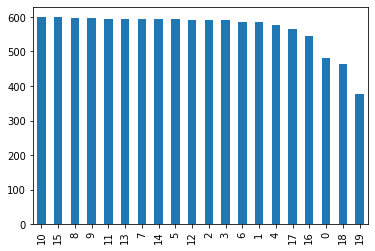

In [22]:
data['target'].value_counts().plot(kind='bar')

In [23]:
data.groupby('target').size().reset_index(name='count')

,target,count
0,0,480
1,1,584
2,2,591
3,3,590
4,4,578
5,5,593
6,6,585
7,7,594
8,8,598
9,9,597


데이터프레임으로부터 다시 메일 본문과 레이블을 분리하고, 테스트 데이터 또한 불러오겠다. subset에 'test'를 기재하면 테스트 데이터를 불러온다. 훈련데이터와 테스트 데이터의 본문과 레이블을 각각 저장한다. 

In [24]:
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True)
train_email=data['email']
train_label=data['target']
test_email=newsdata_test.data
test_label=newsdata_test.target

케라스의 토크나이저 도구를 사용하여 전처리를 진행해봅시다.

In [25]:
#vocab_size는 이번 실습에서 사용할 최대 단어 개수를 정의하는 변수
#케라스 토크나이저를 사용하면 빈도수 순으로 인덱스를 부여하므로, 빈도수가 가장 높은 상위 vocab_size 개수만큼의 단어를 사용합니다.

vocab_size = 10000
num_classes = 20

In [26]:
def prepare_data(train_data,test_data,mode):
  tokenizer=Tokenizer(num_words=vocab_size)
  tokenizer.fit_on_texts(train_data)#토큰화, 인덱스
  X_train=tokenizer.texts_to_matrix(train_data,mode=mode)
  X_test=tokenizer.texts_to_matrix(test_data,mode=mode)

  return X_train,X_test,tokenizer.index_word

In [27]:
X_train,X_test,index_to_word=prepare_data(train_email,test_email,'binary')

y_train=to_categorical(train_label,num_classes)#원핫인코딩
y_test=to_categorical(test_label,num_classes)#원핫인코딩


In [28]:
print('훈련 샘플 본문의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 본문의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 본문의 크기 : (11314, 10000)
훈련 샘플 레이블의 크기 : (11314, 20)
테스트 샘플 본문의 크기 : (7532, 10000)
테스트 샘플 레이블의 크기 : (7532, 20)


In [29]:
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))
print('빈도수 상위 9999번 단어 : {}'.format(index_to_word[9999]))

빈도수 상위 1번 단어 : the
빈도수 상위 9999번 단어 : mic


# 4. 다층 퍼셉트론(MLP)를 사용해 텍스트 분류하기


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [35]:
def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(256, input_shape=(vocab_size,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)
    score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
    return score[1]

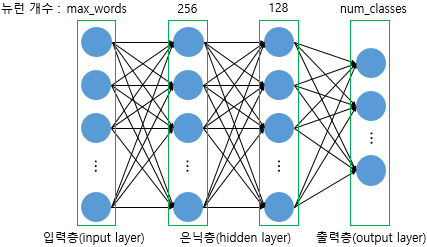

이번에 설계한 다층 퍼셉트론은 은닉층이 2개이므로 깊은 신경망(Deep Neural Network, DNN)입니다.

위 모델에서는 과적합을 막기 위해서 두 번의 드롭아웃(Dropout)을 적용하였습니다. 이 문제는 다중 클래스 분류 문제입니다. 여러 개의 선택지 중에서 하나의 선택지를 고르는 문제인데, 이 경우 20개의 주제 중에서 모델은 자신이 정답이라고 생각하는 1개의 주제를 예측해야 합니다. 다중 클래스 분류 문제이므로 출력층의 활성화 함수로는 소프트맥스 함수를 사용하고, 손실 함수로는 크로스 엔트로피(categorical_crossentropy) 함수를 사용하였습니다.

In [36]:
modes = ['binary', 'count', 'tfidf', 'freq'] # 4개의 모드를 리스트에 저장.

for mode in modes: # 4개의 모드에 대해서 각각 아래의 작업을 반복한다.
    X_train, X_test, _ = prepare_data(train_email, test_email, mode) # 모드에 따라서 데이터를 전처리
    score = fit_and_evaluate(X_train, y_train, X_test, y_test) # 모델을 훈련하고 평가.
    print(mode+' 모드의 테스트 정확도:', score)

Epoch 1/5
80/80 [==============================] - 6s 63ms/step - loss: 2.2745 - accuracy: 0.3365 - val_loss: 0.9480 - val_accuracy: 0.8233
Epoch 2/5
80/80 [==============================] - 3s 37ms/step - loss: 0.8619 - accuracy: 0.7635 - val_loss: 0.4456 - val_accuracy: 0.8940
Epoch 3/5
80/80 [==============================] - 3s 38ms/step - loss: 0.4331 - accuracy: 0.8837 - val_loss: 0.3472 - val_accuracy: 0.9055
Epoch 4/5
80/80 [==============================] - 3s 37ms/step - loss: 0.2562 - accuracy: 0.9334 - val_loss: 0.3231 - val_accuracy: 0.9117
Epoch 5/5
80/80 [==============================] - 3s 37ms/step - loss: 0.1731 - accuracy: 0.9591 - val_loss: 0.3000 - val_accuracy: 0.9196
binary 모드의 테스트 정확도: 0.8248804807662964
Epoch 1/5
80/80 [==============================] - 4s 40ms/step - loss: 2.7809 - accuracy: 0.2514 - val_loss: 1.5456 - val_accuracy: 0.7518
Epoch 2/5
80/80 [==============================] - 3s 37ms/step - loss: 1.4267 - accuracy: 0.6315 - val_loss: 0.6981 - va

대체적으로 82% ~ 83%의 비슷한 정확도를 보이는데, 'freq' 모드에서만 정확도가 69%가 나왔습니다. 아무래도 'freq' 모드는 이번 문제를 풀기위한 적절한 전처리 방법이 아니었던 것 같습니다.